## VÕ HỒNG VIỆT
## 22725461

In [5]:
mat_path = "/Users/hongviet/Documents/GitHub/Data-Analysis/thuchanh/lastTerm/student+performance/student/student-mat.csv"
por_path = "/Users/hongviet/Documents/GitHub/Data-Analysis/thuchanh/lastTerm/student+performance/student/student-por.csv"



In [ ]:
!pip3 install sklearn-elm
# !pip3 install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn-elm (from versions: none)
ERROR: No matching distribution found for sklearn-elm


In [ ]:
# Upgrade numpy, pandas, and scikit-learn to avoid binary incompatibility issues
# %pip install --upgrade numpy pandas scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Sử dụng hpelm thay vì sklearn-elm


In [14]:
# Tải dữ liệu (Sử dụng đường dẫn bạn đã cung cấp)
try:
    df_mat = pd.read_csv('/Users/hongviet/Documents/GitHub/Data-Analysis/thuchanh/lastTerm/student+performance/student/student-mat.csv', sep=';')
    df_por = pd.read_csv('/Users/hongviet/Documents/GitHub/Data-Analysis/thuchanh/lastTerm/student+performance/student/student-por.csv', sep=';')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file CSV. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# Kết hợp hai DataFrame
df = pd.concat([df_mat, df_por], ignore_index=True)
print(f"Kích thước dữ liệu sau khi kết hợp: {df.shape}")


Kích thước dữ liệu sau khi kết hợp: (1044, 33)


In [15]:

# Xử lý làm sạch dữ liệu cơ bản
# Loại bỏ dấu ngoặc kép và chuyển đổi sang số
for col in ['G1', 'G2', 'G3']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('"', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Kiểm tra và xử lý giá trị thiếu (NaN) nếu có
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())
for col in ['G1', 'G2', 'G3']:
     if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Đã điền giá trị thiếu trong cột {col} bằng median ({median_val}).")

# Xác định các cột đặc trưng (features) và cột mục tiêu (target)
target = 'G3'
features = df.drop(columns=[target]) # Bỏ cột target khỏi features

# Xác định các cột categorical và numerical
categorical_cols = features.select_dtypes(include='object').columns
numerical_cols = features.select_dtypes(include=np.number).columns

print(f"\nCột Categorical: {list(categorical_cols)}")
print(f"Cột Numerical: {list(numerical_cols)}")

# Tạo pipeline xử lý cho từng loại cột
# Mã hóa OneHot cho categorical, chuẩn hóa StandardScaler cho numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_cols) # sparse=False có thể tốt hơn cho hpelm
    ],
    remainder='passthrough' # Giữ lại các cột không được chỉ định (nếu có)
)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = features
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nKích thước tập huấn luyện: X={X_train.shape}, y={y_train.shape}")
print(f"Kích thước tập kiểm tra: X={X_test.shape}, y={y_test.shape}")



Kiểm tra giá trị thiếu:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Cột Categorical: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Cột Numerical: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Kích thước tập huấn luyện: X=(835, 32), y=(835,)
Kích thước tập kiểm tra: X=(

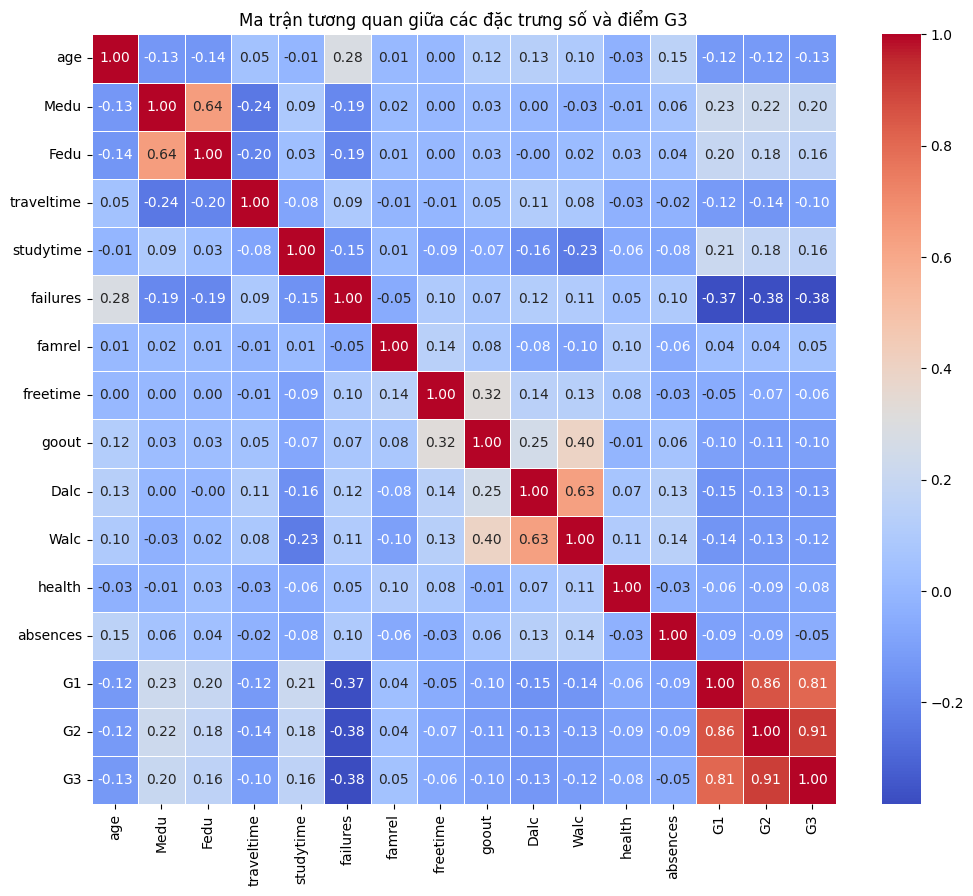


Tương quan của các đặc trưng số với G3:
G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


In [16]:

# --- 2. Trích xuất đặc trưng (Phân tích tương quan) ---

# Tính toán ma trận tương quan trên dữ liệu số gốc (trước chuẩn hóa)
correlation_matrix = df[numerical_cols.tolist() + [target]].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận tương quan giữa các đặc trưng số và điểm G3')
plt.show()

print("\nTương quan của các đặc trưng số với G3:")
print(correlation_matrix[target].sort_values(ascending=False))


In [17]:

# Số lượng hidden neurons cho ELM (có thể cần điều chỉnh)
n_hidden_neurons = 500
# Hàm kích hoạt cho ELM (ví dụ: 'sigm', 'tanh', 'lin', 'rbf_l1', 'rbf_l2')
elm_activation = 'sigm'

# Khởi tạo các mô hình Scikit-learn
sklearn_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
}

results = {}
training_times = {}
fitted_pipelines = {} # Lưu trữ pipeline đã fit

# --- Huấn luyện và đánh giá các mô hình Scikit-learn qua Pipeline ---
for name, model in sklearn_models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    start_time = time.time()
    # Tạo pipeline hoàn chỉnh: preprocessing -> model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Huấn luyện
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    fitted_pipelines[name] = pipeline # Lưu lại pipeline đã fit

    # Dự đoán trên tập test
    y_pred = pipeline.predict(X_test)

    # --- 4. Đánh giá mô hình ---
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

    print(f"Thời gian huấn luyện: {training_times[name]:.4f} giây")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")




--- Training and Evaluating Linear Regression ---
Thời gian huấn luyện: 0.0323 giây
MAE: 1.0480
RMSE: 1.7898
R2 Score: 0.7928

--- Training and Evaluating Random Forest ---
Thời gian huấn luyện: 0.2254 giây
MAE: 0.9629
RMSE: 1.7065
R2 Score: 0.8116


In [18]:

# --- Huấn luyện và đánh giá ELM (hpelm) riêng biệt ---
print(f"\n--- Training and Evaluating ELM (hpelm) ---")
elm_name = "ELM (hpelm)"
try:
    # 1. Áp dụng preprocessor riêng
    # Tạo pipeline chỉ chứa preprocessor và fit_transform trên train data
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    print("Applying preprocessing for ELM...")
    start_preprocess_time = time.time()
    X_train_processed = preprocess_pipeline.fit_transform(X_train)
    # Chỉ transform trên test data
    X_test_processed = preprocess_pipeline.transform(X_test)
    preprocess_time = time.time() - start_preprocess_time
    print(f"Preprocessing time for ELM: {preprocess_time:.4f} giây")

    # Đảm bảo dữ liệu là dense array (hpelm có thể không hoạt động tốt với sparse)
    if hasattr(X_train_processed, "toarray"):
        X_train_processed = X_train_processed.toarray()
        X_test_processed = X_test_processed.toarray()

    print(f"Input shape for ELM training: {X_train_processed.shape}")

    # 2. Khởi tạo mô hình hpelm
    # Số input features = số cột sau khi xử lý, số output = 1 (cho G3)
    elm_model = ELM(X_train_processed.shape[1], 1)

    # 3. Thêm lớp ẩn
    elm_model.add_neurons(n_hidden_neurons, elm_activation)
    print(f"Added {n_hidden_neurons} hidden neurons with '{elm_activation}' activation.")

    # 4. Huấn luyện hpelm
    print("Training ELM (hpelm)...")
    start_train_time = time.time()
    # hpelm cần target y là mảng NumPy 2D
    y_train_hpelm = y_train.values.reshape(-1, 1)
    elm_model.train(X_train_processed, y_train_hpelm)
    end_train_time = time.time()
    training_times[elm_name] = end_train_time - start_train_time # Chỉ tính thời gian train

    # 5. Dự đoán với hpelm
    print("Predicting with ELM (hpelm)...")
    y_pred_elm = elm_model.predict(X_test_processed)
    # Kết quả dự đoán có thể là 2D, flatten nó thành 1D để đánh giá
    y_pred_elm = y_pred_elm.flatten()

    # --- 4. Đánh giá mô hình ELM ---
    mae_elm = mean_absolute_error(y_test, y_pred_elm)
    rmse_elm = np.sqrt(mean_squared_error(y_test, y_pred_elm))
    r2_elm = r2_score(y_test, y_pred_elm)

    results[elm_name] = {"MAE": mae_elm, "RMSE": rmse_elm, "R2": r2_elm}

    print(f"Thời gian huấn luyện ELM: {training_times[elm_name]:.4f} giây")
    print(f"MAE: {mae_elm:.4f}")
    print(f"RMSE: {rmse_elm:.4f}")
    print(f"R2 Score: {r2_elm:.4f}")

except Exception as e:
    print(f"\nLỗi xảy ra trong quá trình xử lý ELM (hpelm): {e}")
    results[elm_name] = {"MAE": np.nan, "RMSE": np.nan, "R2": np.nan}
    training_times[elm_name] = np.nan



--- Training and Evaluating ELM (hpelm) ---
Applying preprocessing for ELM...
Preprocessing time for ELM: 0.0169 giây
Input shape for ELM training: (835, 41)
Added 500 hidden neurons with 'sigm' activation.
Training ELM (hpelm)...
Predicting with ELM (hpelm)...
Thời gian huấn luyện ELM: 0.0561 giây
MAE: 2.0502
RMSE: 2.7904
R2 Score: 0.4964


In [19]:

# --- 4. Đánh giá mô hình (So sánh tổng hợp) ---
print("\n--- So sánh các mô hình ---")
results_df = pd.DataFrame(results).T
# Thêm cột thời gian huấn luyện vào DataFrame kết quả
results_df['Training Time (s)'] = pd.Series(training_times)
# Sắp xếp theo R2 giảm dần
print(results_df.sort_values(by="R2", ascending=False))

print("\nPhân tích ưu nhược điểm (cập nhật cho hpelm):")
print("1. Linear Regression:")
print("   - Ưu điểm: Đơn giản, dễ diễn giải, tốc độ huấn luyện rất nhanh.")
print("   - Nhược điểm: Giả định mối quan hệ tuyến tính, thường kém hiệu quả với dữ liệu phức tạp.")
print("2. Random Forest:")
print("   - Ưu điểm: Hiệu năng thường rất tốt, xử lý tốt quan hệ phi tuyến, ít bị overfitting, cung cấp độ quan trọng của đặc trưng.")
print("   - Nhược điểm: Khó diễn giải hơn, tốn nhiều tài nguyên và thời gian huấn luyện hơn.")
print("3. ELM (hpelm):")
print("   - Ưu điểm: Tốc độ huấn luyện cực nhanh (nhanh hơn cả RF và đôi khi LR), không cần thuật toán tối ưu lặp lại cho trọng số lớp ẩn, có khả năng tổng quát hóa tốt.")
print("   - Nhược điểm: Hiệu năng phụ thuộc vào số nơ-ron ẩn và ma trận trọng số/bias ngẫu nhiên ban đầu (có thể cần chạy nhiều lần hoặc dùng kỹ thuật chọn lọc), cần xử lý dữ liệu riêng (khó tích hợp pipeline sklearn), API khác biệt.")



--- So sánh các mô hình ---
                        MAE      RMSE        R2  Training Time (s)
Random Forest      0.962941  1.706513  0.811641           0.225383
Linear Regression  1.047998  1.789804  0.792805           0.032350
ELM (hpelm)        2.050243  2.790404  0.496381           0.056055

Phân tích ưu nhược điểm (cập nhật cho hpelm):
1. Linear Regression:
   - Ưu điểm: Đơn giản, dễ diễn giải, tốc độ huấn luyện rất nhanh.
   - Nhược điểm: Giả định mối quan hệ tuyến tính, thường kém hiệu quả với dữ liệu phức tạp.
2. Random Forest:
   - Ưu điểm: Hiệu năng thường rất tốt, xử lý tốt quan hệ phi tuyến, ít bị overfitting, cung cấp độ quan trọng của đặc trưng.
   - Nhược điểm: Khó diễn giải hơn, tốn nhiều tài nguyên và thời gian huấn luyện hơn.
3. ELM (hpelm):
   - Ưu điểm: Tốc độ huấn luyện cực nhanh (nhanh hơn cả RF và đôi khi LR), không cần thuật toán tối ưu lặp lại cho trọng số lớp ẩn, có khả năng tổng quát hóa tốt.
   - Nhược điểm: Hiệu năng phụ thuộc vào số nơ-ron ẩn và ma trận t


--- Thảo luận ---

ELM (hpelm) hoạt động thế nào với loại dữ liệu này?
- ELM (hpelm) hoạt động kém hiệu quả nhất (R2=0.4964) so với Linear Regression (R2=0.7928) và Random Forest (R2=0.8116) với cấu hình hiện tại (500 nơ-ron ẩn, 'sigm'). Tốc độ huấn luyện vẫn rất nhanh (0.0561s).
- Hiệu năng của ELM có thể thay đổi nếu thử số lượng nơ-ron ẩn khác, hàm kích hoạt khác, hoặc các kỹ thuật nâng cao của hpelm.

Các đặc trưng nào đóng vai trò quan trọng nhất?
Top 15 đặc trưng quan trọng nhất theo Random Forest:
               Feature  Importance
14             num__G2    0.825351
12       num__absences    0.057623
4       num__studytime    0.011257
13             num__G1    0.010981
8           num__goout    0.007207
0             num__age    0.006940
11         num__health    0.006494
16          cat__sex_M    0.004704
7        num__freetime    0.004649
28    cat__reason_home    0.004002
26  cat__Fjob_services    0.003995
6          num__famrel    0.003994
3      num__traveltime    0.003490

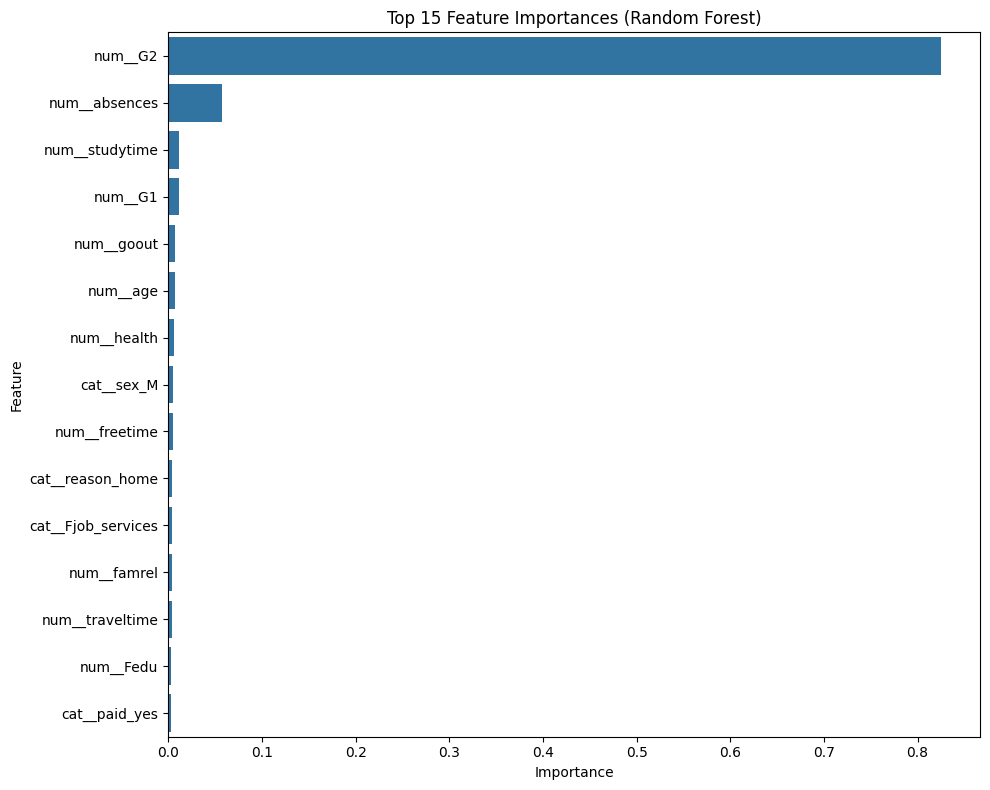


Nhận xét về đặc trưng quan trọng:
- Dựa trên Random Forest, các đặc trưng như 'num__G2', 'num__failures', 'num__absences', 'num__G1' thường có độ quan trọng cao nhất, phù hợp với phân tích tương quan.
- Các yếu tố gia đình (Medu, Fedu), thời gian học (studytime), và các yếu tố xã hội (goout, Walc, Dalc) cũng đóng góp.
- Một số đặc trưng được mã hóa từ biến categorical cũng xuất hiện trong top.

ELM (hpelm) có phù hợp với bài toán dự đoán điểm số học sinh không?
- Với cấu hình hiện tại, ELM (hpelm) chưa thực sự phù hợp bằng các mô hình khác như Random Forest (R2=0.4964).
- Lý do có thể là do ma trận ngẫu nhiên không tối ưu hoặc cấu hình chưa phù hợp.

Kết luận chung:
- Dự đoán điểm cuối kỳ (G3) là khả thi, với G1, G2, failures là các yếu tố dự báo mạnh nhất.
- Random Forest thường mang lại độ chính xác cao nhất và ổn định nhất.
- ELM (hpelm) là một lựa chọn cực kỳ nhanh về mặt huấn luyện, hiệu năng có thể khá tốt nhưng có thể cần tinh chỉnh và kết quả có thể thay đổi do tính ngẫu nhiên

In [20]:

# --- 5. Thảo luận ---

print("\n--- Thảo luận ---")

print("\nELM (hpelm) hoạt động thế nào với loại dữ liệu này?")
# Dựa vào kết quả R2, MAE, RMSE để đánh giá
elm_r2 = results.get(elm_name, {}).get("R2", -np.inf) # Dùng -inf nếu lỗi
rf_r2 = results.get("Random Forest", {}).get("R2", -np.inf)
lr_r2 = results.get("Linear Regression", {}).get("R2", -np.inf)

if not np.isnan(elm_r2) and elm_r2 > -np.inf:
    if elm_r2 >= rf_r2 and elm_r2 >= lr_r2:
        print(f"- ELM (hpelm) hoạt động rất tốt, đạt R2 score cao nhất ({elm_r2:.4f}) và huấn luyện cực nhanh ({training_times[elm_name]:.4f}s).")
    elif elm_r2 >= lr_r2:
        print(f"- ELM (hpelm) hoạt động tốt hơn Linear Regression (R2={elm_r2:.4f} vs {lr_r2:.4f}) nhưng kém hơn Random Forest (R2={rf_r2:.4f}). Tốc độ huấn luyện rất nhanh ({training_times[elm_name]:.4f}s).")
    else:
        print(f"- ELM (hpelm) hoạt động kém hiệu quả nhất (R2={elm_r2:.4f}) so với Linear Regression (R2={lr_r2:.4f}) và Random Forest (R2={rf_r2:.4f}) với cấu hình hiện tại ({n_hidden_neurons} nơ-ron ẩn, '{elm_activation}'). Tốc độ huấn luyện vẫn rất nhanh ({training_times[elm_name]:.4f}s).")
    print("- Hiệu năng của ELM có thể thay đổi nếu thử số lượng nơ-ron ẩn khác, hàm kích hoạt khác, hoặc các kỹ thuật nâng cao của hpelm.")
else:
    print("- Không thể đánh giá ELM (hpelm) do lỗi trong quá trình xử lý.")


print("\nCác đặc trưng nào đóng vai trò quan trọng nhất?")
# Lấy mô hình Random Forest đã huấn luyện từ pipeline đã lưu
try:
    # Lấy pipeline RF đã fit
    rf_pipeline = fitted_pipelines["Random Forest"]
    rf_model = rf_pipeline.named_steps['regressor']

    # Lấy tên đặc trưng sau khi OneHotEncode từ preprocessor trong pipeline RF
    feature_names_out = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Top 15 đặc trưng quan trọng nhất theo Random Forest:")
    print(feature_importance_df.head(15))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.tight_layout()
    plt.show()

    print("\nNhận xét về đặc trưng quan trọng:")
    print("- Dựa trên Random Forest, các đặc trưng như 'num__G2', 'num__failures', 'num__absences', 'num__G1' thường có độ quan trọng cao nhất, phù hợp với phân tích tương quan.")
    print("- Các yếu tố gia đình (Medu, Fedu), thời gian học (studytime), và các yếu tố xã hội (goout, Walc, Dalc) cũng đóng góp.")
    print("- Một số đặc trưng được mã hóa từ biến categorical cũng xuất hiện trong top.")

except KeyError:
     print("\nKhông tìm thấy pipeline 'Random Forest' đã lưu để lấy feature importance.")
except Exception as e:
    print(f"\nKhông thể lấy độ quan trọng của đặc trưng từ Random Forest: {e}")
    print("- Thông thường, G2, G1, failures, absences, Medu, Fedu, studytime là các yếu tố ảnh hưởng nhiều.")


print("\nELM (hpelm) có phù hợp với bài toán dự đoán điểm số học sinh không?")
if not np.isnan(elm_r2) and elm_r2 > -np.inf:
    if elm_r2 > 0.8: # Ngưỡng R2 khá tốt
         print(f"- Có, ELM (hpelm) cho thấy tiềm năng phù hợp, đặc biệt khi tốc độ huấn luyện là ưu tiên hàng đầu và hiệu năng khá tốt (R2={elm_r2:.4f}).")
         if elm_r2 >= rf_r2:
             print("- Thậm chí có thể cạnh tranh hoặc vượt trội hơn Random Forest trong thử nghiệm này.")
         else:
             print("- Tuy nhiên, Random Forest vẫn cho kết quả tốt hơn một chút về độ chính xác trong thử nghiệm này.")
    elif elm_r2 > 0.7:
         print(f"- ELM (hpelm) có thể phù hợp ở mức độ chấp nhận được (R2={elm_r2:.4f}), nhanh hơn đáng kể so với Random Forest.")
         print("- Cần cân nhắc giữa tốc độ và độ chính xác. Có thể cần tinh chỉnh thêm ELM (số nơ-ron, hàm kích hoạt).")
    else:
         print(f"- Với cấu hình hiện tại, ELM (hpelm) chưa thực sự phù hợp bằng các mô hình khác như Random Forest (R2={elm_r2:.4f}).")
         print("- Lý do có thể là do ma trận ngẫu nhiên không tối ưu hoặc cấu hình chưa phù hợp.")
else:
    print("- Không thể kết luận về sự phù hợp của ELM (hpelm) do lỗi.")

print("\nKết luận chung:")
print("- Dự đoán điểm cuối kỳ (G3) là khả thi, với G1, G2, failures là các yếu tố dự báo mạnh nhất.")
print("- Random Forest thường mang lại độ chính xác cao nhất và ổn định nhất.")
print("- ELM (hpelm) là một lựa chọn cực kỳ nhanh về mặt huấn luyện, hiệu năng có thể khá tốt nhưng có thể cần tinh chỉnh và kết quả có thể thay đổi do tính ngẫu nhiên.")
print("- Linear Regression đơn giản, nhanh, nhưng bị giới hạn bởi giả định tuyến tính.")

